In [1]:
%load_ext autoreload
%autoreload 2


import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute absolute path to the directory you want to import from
sys.path.append(os.path.abspath(".."))

import main

b = 3
data_path = "../data/IMS/1st_test/"
data = f"features_{b}.csv"

df = pd.read_csv(os.path.join(data_path, data))

df = main.preprocessing(df) 

X_train, X_test, X_val = main.test_train_data(df)



2025-11-16 11:09:56.352328: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-16 11:09:56.352540: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-16 11:09:56.378123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-16 11:09:57.206333: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

E0000 00:00:1763287797.350147   15234 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1763287797.357336   15234 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4301 - val_loss: 0.3461
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4293 - val_loss: 0.3454
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4285 - val_loss: 0.3446
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4277 - val_loss: 0.3439
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4269 - val_loss: 0.3431
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4261 - val_loss: 0.3424
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4253 - val_loss: 0.3416
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4245 - val_loss: 0.3409
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4237 - val_loss: 0.3401
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4228 - val_loss: 0.3393
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4219 - val_loss: 0.3385
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4

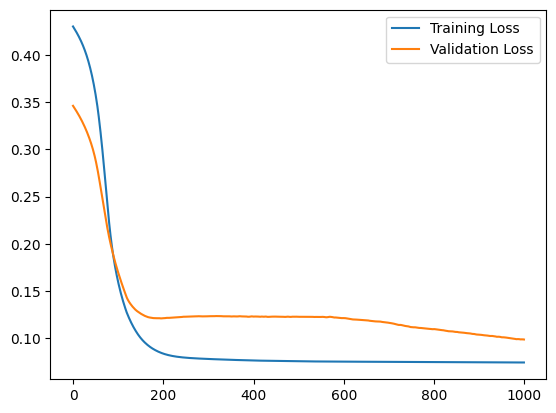

In [2]:
autoencoder = main.create_model(X_train, X_test)

history = autoencoder.fit(X_train, X_train,
          epochs=1000,
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)


plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


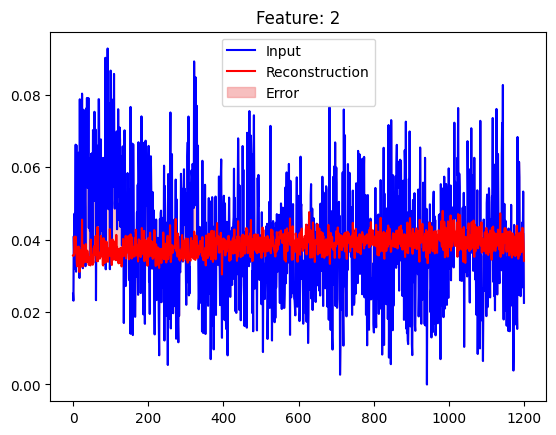

In [3]:


encoded_data = autoencoder.encoder(X_train).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()


feature_index = 2   # or the name: 'temp'
feature_name = X_train.columns[feature_index]

plt.plot(X_train[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_train)),
    X_train[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()



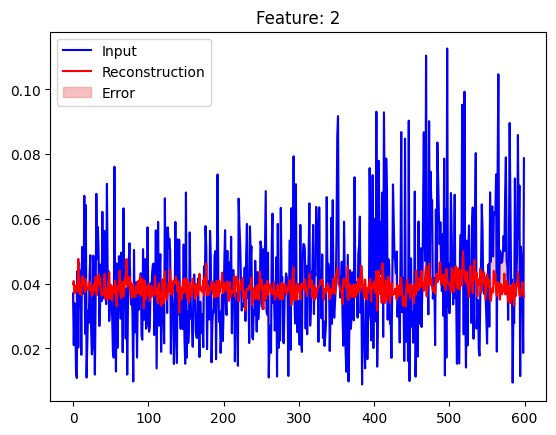

In [4]:
encoded_data = autoencoder.encoder(X_val).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(X_val[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_val)),
    X_val[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()


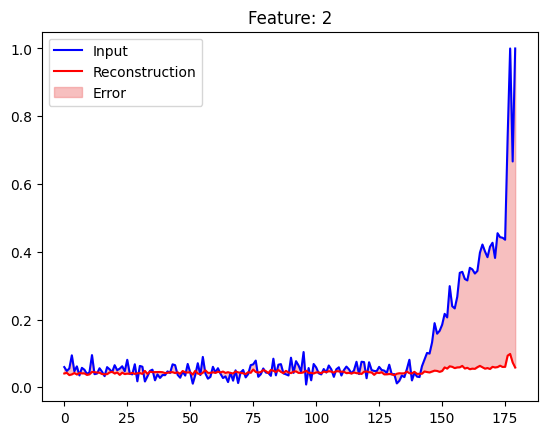

In [5]:
encoded_data = autoencoder.encoder(X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(X_test[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_test)),
    X_test[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


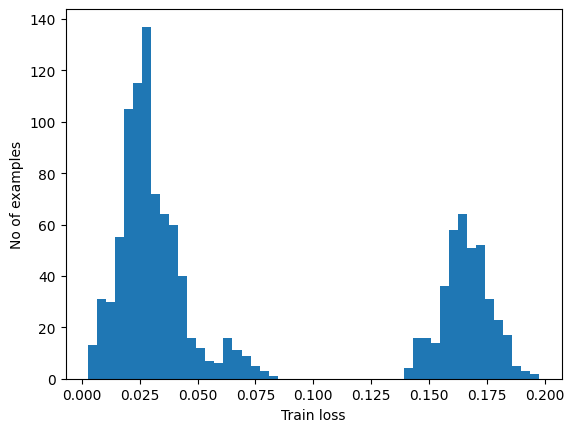

In [6]:
import tensorflow as tf


reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()


In [7]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  0.13950753274377375


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


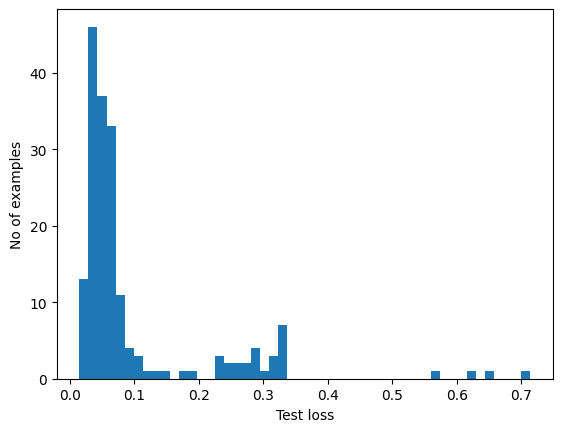

In [8]:
reconstructions = autoencoder.predict(X_test)
test_loss = tf.keras.losses.mae(reconstructions, X_test)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()


In [9]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


In [10]:
preds = predict(autoencoder, X_test, threshold)

